In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
import math

In [200]:
data = pd.read_csv('DATA/B-train.csv')
dataTest = pd.read_csv('DATA/B-test.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [201]:
dataTest

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.26,96.68,10510.35,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,NaN,27.30,36952.37,B_02
2,NaN,49.86,1.00,-5.35,0.72,-9.81,NaN,24768.46,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.61,-15.11,NaN,B_04
4,140.49,59.99,0.05,6.55,NaN,-0.42,109.93,2603.04,B_05
5,54.08,NaN,11.00,-16.44,5.31,17.83,-90.67,5.20,B_06
6,106.48,-50.55,16.47,NaN,1.34,-11.53,138.03,1753.93,B_07
7,-83.82,-104.84,NaN,-13.70,10.19,-2.51,-34.02,7494.36,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.99,37.34,249.96,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.57,-24.65,20.43,B_10


In [202]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data[i].fillna(data[i].mean(),inplace=True)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [204]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    dataTest[i].fillna(dataTest[i].mean(),inplace=True)

In [205]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   x8      10 non-null     float64
 8   y       10 non-null     object 
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [206]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = np.nan
        elif(data[i][j] > upper_bound ):
            data[i][j] = np.nan
        inplace=True

In [207]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    data.dropna(subset=[i],inplace=True)

In [208]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
1,120.850000,163.830000,14.750000,-2.120000,8.610000,28.05,-73.580000,670.29,7.28
3,-65.720000,-36.370000,10.760000,-8.880000,15.040000,-5.70,14.600000,1054.30,6.66
4,11.000000,-64.780000,-3.230000,7.370000,25.740000,20.48,91.130000,102.21,-0.25
7,19.840000,-12.012278,15.040000,2.110000,-10.950000,-0.82,-11.300000,10.82,2.19
8,-21.320000,2.660000,4.680000,-5.560000,24.720000,4.04,9.960000,751.86,6.25
...,...,...,...,...,...,...,...,...,...
185,14.175056,8.790000,-10.480000,-0.299167,12.520000,-10.13,16.658889,1174.43,3.69
186,-30.810000,48.650000,-2.560663,2.580000,8.720000,6.97,-69.110000,1583.24,5.99
187,14.175056,50.330000,3.130000,13.030000,-0.412044,4.53,-173.700000,254.72,-6.73
188,101.460000,-67.420000,0.440000,-3.740000,8.930000,-4.29,21.790000,40925.29,-13.39


In [209]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

<AxesSubplot:>

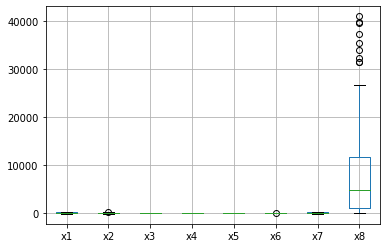

In [210]:
X.boxplot()

<AxesSubplot:>

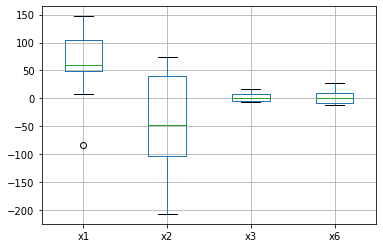

In [211]:
XTest = dataTest[["x1","x2","x3","x6"]]
XTest.boxplot()

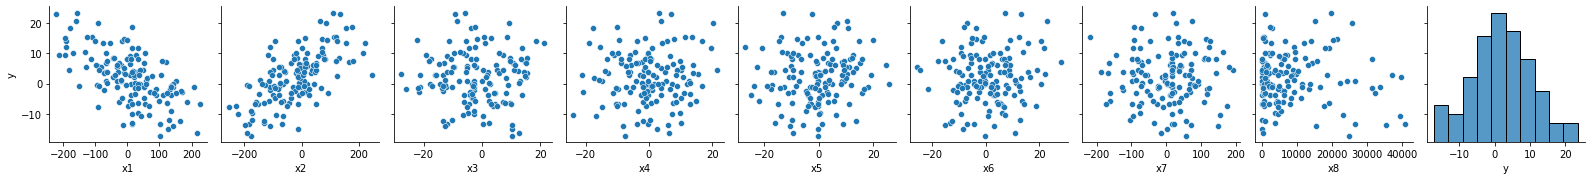

In [212]:
sns.pairplot(data, x_vars=data.columns, y_vars=["y"])

<AxesSubplot:>

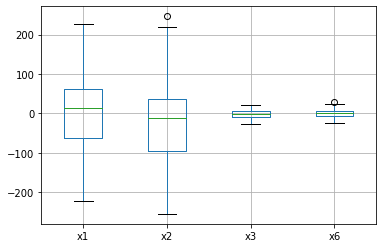

In [213]:
X = data[["x1","x2","x3","x6"]]
Y = data[["y"]]
X.boxplot()

In [216]:
X_train = X
y_train = Y
X_test = XTest

In [217]:
X_train

,x1,x2,x3,x6
1,120.850000,163.830000,14.750000,28.05
3,-65.720000,-36.370000,10.760000,-5.70
4,11.000000,-64.780000,-3.230000,20.48
7,19.840000,-12.012278,15.040000,-0.82
8,-21.320000,2.660000,4.680000,4.04
...,...,...,...,...
185,14.175056,8.790000,-10.480000,-10.13
186,-30.810000,48.650000,-2.560663,6.97
187,14.175056,50.330000,3.130000,4.53
188,101.460000,-67.420000,0.440000,-4.29


In [218]:
y_train

,y
1,7.28
3,6.66
4,-0.25
7,2.19
8,6.25
...,...
185,3.69
186,5.99
187,-6.73
188,-13.39


In [219]:
X_test

,x1,x2,x3,x6
0,50.690000,-120.500000,-5.93,-9.260000
1,102.080000,74.690000,-4.95,2.941111
2,63.913333,49.860000,1.00,-9.810000
3,49.390000,-101.880000,8.69,4.610000
4,140.490000,59.990000,0.05,-0.420000
5,54.080000,-43.464444,11.00,17.830000
6,106.480000,-50.550000,16.47,-11.530000
7,-83.820000,-104.840000,2.10,-2.510000
8,147.150000,9.140000,-3.06,26.990000
9,8.680000,-207.090000,-4.37,10.570000


In [220]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_pred

array([[-5.79546508],
       [ 2.83761805],
       [ 1.96646647],
       [-4.71419386],
       [-0.38047502],
       [-1.02332357],
       [-6.54676418],
       [ 1.42296716],
       [-1.03494879],
       [-6.90185851]])